In [4]:
# unable colab to access git
!git clone https://github.com/yifeica0/ECS171-Group8.git
%cd ECS171-Group8
!git checkout data_preprocessing


Cloning into 'ECS171-Group8'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 40 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 22.73 MiB | 13.60 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/bin/bash: line 1: checkout: command not found


In [8]:
# update repo informations
!git pull

Already up to date.


[Errno 2] No such file or directory: 'ECS171-Group8'
/content/ECS171-Group8
Already on 'data_preprocessing'
Your branch is up to date with 'origin/data_preprocessing'.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# load dataframe
df = pd.read_parquet('amazon_user_reviews.parquet')

In [11]:
# understand df
df.head()
df.columns

,category,rating,tokens,text_cleaned,original_text,token_count,title,images,verified_purchase,asin,parent_asin,user_id,datetime,helpful_vote
0,All_Beauty,5.0,"[great, party, lot, color, nice, give, cute, l...",great party lot color nice give cute look went...,These are great for parties. It has a lot of c...,25,great for parties,[],False,B07Z548TKH,B07Z548TKH,AGZZXSMMS4WRHHJRBUJZI4FZDHKQ,2020-08-12 21:05:33.567,1
1,All_Beauty,3.0,"[videoid, three, individually, wrapped, bath, ...",videoid three individually wrapped bath bomb s...,[[VIDEOID:f77804a8088c40dfbef6fdcfacf8b15a]] T...,132,cute mom gift but not as fragrant or impressiv...,"[{'attachment_type': 'IMAGE', 'large_image_url...",False,B095CG2ZV1,B095CG2ZV1,AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,2021-09-11 13:31:15.148,1
2,All_Beauty,1.0,"[moisturizing, real, messy]",moisturizing real messy,Not very moisturizing and real messy.,3,one star,[],True,B00TP79D7A,B00TP79D7A,AFBSBG6VFGAHXSK4SZWLQDBKIFHQ,2015-09-13 01:35:02.000,0
3,All_Beauty,5.0,"[high, quality, tool, like, dentist, us, come,...",high quality tool like dentist us come storage...,"High quality tools, just like your dentist use...",13,"high quality tools,",[],False,B08QYW2FJ2,B08QYW2FJ2,AH7LDXK3GT67FZKMRW7MP477DJVQ,2021-04-20 04:21:07.963,0
4,All_Beauty,5.0,"[could, use, one, bundle, fantastic, hair, wou...",could use one bundle fantastic hair would litt...,You could use one bundle of this fantastic hai...,17,get two bundles for best results,[],False,B07Z7S97V8,B07Z7S97V8,AG73BVBKUOH22USSFJA5ZWL7AKXA,2020-04-21 02:16:00.515,0


In [16]:
categories = [
    "All_Beauty",
    "Amazon_Fashion",
    "Appliances",
    "Arts_Crafts_and_Sewing",
    "Automotive",
    "Baby_Products",
    "Beauty_and_Personal_Care",
    "Books",
    "CDs_and_Vinyl",
    "Cell_Phones_and_Accessories",
    "Clothing_Shoes_and_Jewelry",
    "Digital_Music",
    "Electronics",
    "Gift_Cards",
    "Grocery_and_Gourmet_Food",
    "Handmade_Products",
    "Health_and_Household",
    "Health_and_Personal_Care",
    "Home_and_Kitchen",
    "Industrial_and_Scientific",
    "Kindle_Store",
    "Magazine_Subscriptions",
    "Movies_and_TV",
    "Musical_Instruments",
    "Office_Products",
    "Patio_Lawn_and_Garden",
    "Pet_Supplies",
    "Software",
    "Sports_and_Outdoors",
    "Subscription_Boxes",
    "Tools_and_Home_Improvement",
    "Toys_and_Games",
    "Video_Games",
    "Unknown"
]

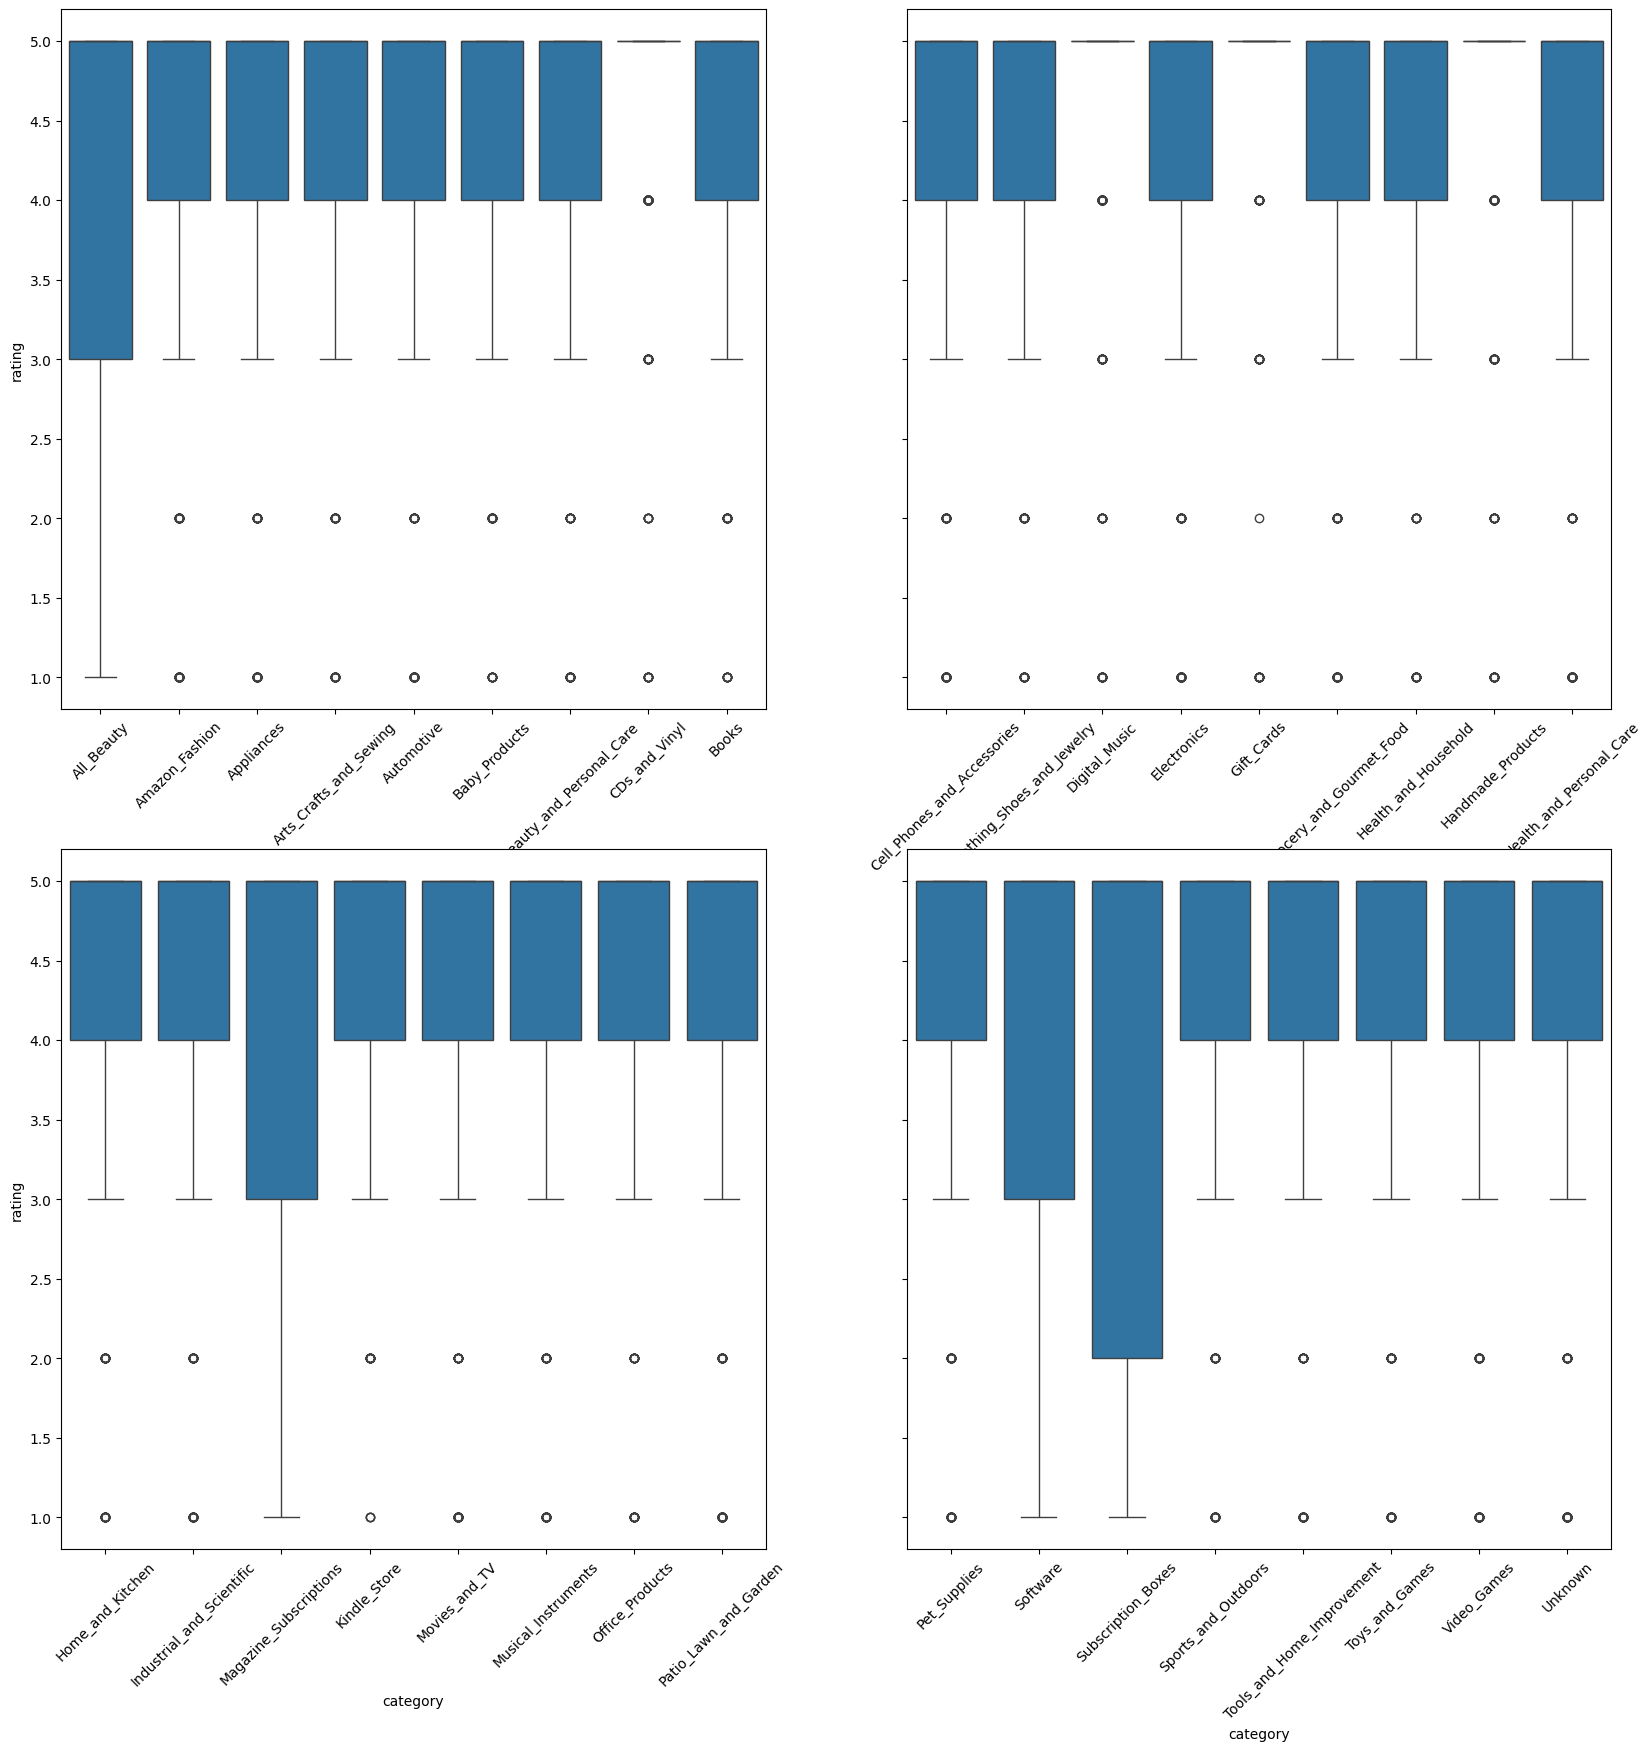

In [31]:
"""
product and categorical EDA:
visualize the difference in rating among products or categories
- Boxplot comparing categories
- Frequent product in categories
- Popularity of product in each categories
"""

# boxplot to show rating distribution

# create 4 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(20, 20))
axes = axes.flatten()

#split categories into 4 part
parts = np.array_split(categories, 4)

# loop to plot all categories into 4 separate subplots
for i in range(4):
  subdf = df[df['category'].isin(parts[i])]
  sns.boxplot(x='category', y='rating', data=subdf, ax=axes[i])
  axes[i].tick_params(axis='x', rotation=45)

plt.show()

In [ ]:
"""
time series EDA:
visualize the time and seasonal difference
- Yearly, monthly, day/night
"""

'\ntime series EDA:\nvisualize the time and seasonal difference\n- Yearly, monthly, day/night\n'